# Introduction to Portfolio Construction and Analysis with Python
EDHEC Business School  
https://www.coursera.org/learn/introduction-portfolio-construction-python

## Interactive Plotting and Monte Carlo Simulations of CPPI

In [25]:
import sys  
sys.path.append('../src') 
from edhec_risk_kit import *

import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import edhec_risk_kit as erk

import matplotlib.pyplot as plt

DATA_FOLDER = '../data/'

%matplotlib inline

## A basic GBM Interactive Plots

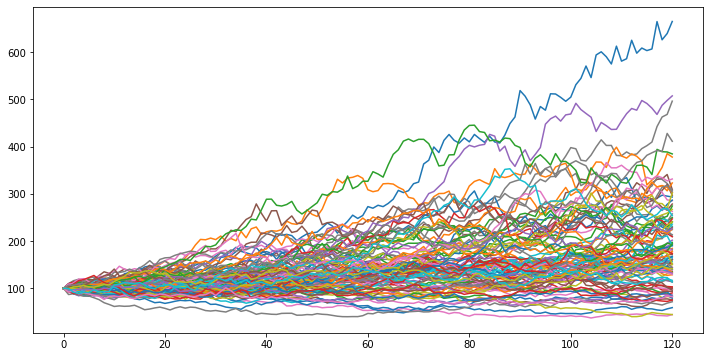

In [26]:
erk.gbm(10,100).plot(legend=False, figsize=(12,6))
plt.show()

Create a function to be used for interactive plots

In [27]:
def show_gbm(n_scenarios, mu, sigma):
    s_0 = 100
    prices = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma= sigma, s_0=s_0)
    ax = prices.plot(legend=False, color='indianred', alpha=0.5, linewidth=2, figsize=(12,5))
    ax.axhline(y=s_0, ls=":", color='black')
    ax.set_ylim(top=400)
    ax.plot(0, s_0, marker='o', color='darkred', alpha=0.2)

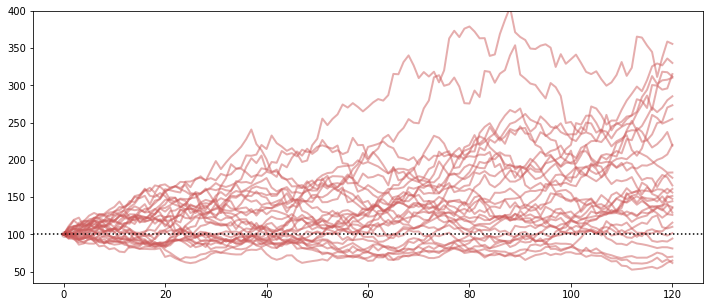

In [28]:
show_gbm(30,0.07,0.15)

Create the controls of the interactive plots 

Parameters
1. Minimum
2. Maximum
3. Steps

In [30]:
gbm_controls = widgets.interactive(show_gbm, 
                                   n_scenarios = (1,20,1),
                                   mu = (-0.2,0.2,0.01),
                                   sigma = (0, .3, .01)
                                  )

Display interactive plots

In [31]:
display(gbm_controls)

interactive(children=(IntSlider(value=10, description='n_scenarios', max=20, min=1), FloatSlider(value=0.0, de…

## Interactive CPPI Simulation - Monte Carlo

Note the interaction between Multiplier, m, which is the aggressivity parameter and the volatility of the market.  

While the volatility of the market is not really controllable, but you can kind of instinctively hope to see that the idea is that if the markets are very volatile, you probably want to use a **small m**. 

If the markets are very calm, you probably want to use a **large m**, which is exactly what people try and do, which is they try and have a ***dynamic m*** instead of just a fixed m. 

Try and make sure that m is appropriate for the market conditions that they see going forward.

In [42]:
### PLOT
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start=100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr['Wealth']
    y_max = wealth.values.max() * y_max/100
    ax = wealth.plot(legend=False, alpha=0.3, color="indianred", figsize=(12,6))
    ax.axhline(y=start, ls=":", color='black')
    ax.axhline(y=start*floor, ls="--", color='red')
    ax.set_ylim(top=y_max)
    
### CONTROLS
cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu=(0., +.2, .01),
                                    sigma=(0, .30, .05),
                                    floor=(0, 2, .1),
                                    m=(1, 5, .5),
                                    riskfree_rate=(0.,.05,.01),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, 
                                                            description='Zoom Y Axis')
                                    )

Play with the CPPI parameters
1.  Set a floor and observe how portfolio wealth values evolves over time
2.  Under what scenarios will the portfolio wealth values be negative or below the floor
3. Adjust the Zoom Y Axis to see whether any scenario breaks the floor

In [43]:
### DISPLAY
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

## Interactive CPPI Simulation with Terminal Value Distribution

In [44]:
### PLOT
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start=100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr['Wealth']
    y_max = wealth.values.max() * y_max/100

    terminal_wealth = wealth.iloc[-1]
    
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, 
                                             gridspec_kw={'width_ratios':[3,2]}, figsize=(24,9))
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred")
    wealth_ax.axhline(y=start, ls=":", color='black')
    wealth_ax.axhline(y=start*floor, ls="--", color='red')
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color='black')

### CONTROLS
cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu=(0., +.2, .01),
                                    sigma=(0, .30, .05),
                                    floor=(0, 2, .1),
                                    m=(1, 5, .5),
                                    riskfree_rate=(0.,.05,.01),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, 
                                                            description='Zoom Y Axis')
                                    )

### DISPLAY
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

## Interactive CPPI Simulation  with Statistics and Violation Count

In [48]:
### PLOT
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start=100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr['Wealth']
    
    y_max = wealth.values.max() * y_max/100
    terminal_wealth = wealth.iloc[-1]

    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()
    failure_mask = np.less(terminal_wealth, start*floor)
    n_failures = failure_mask.sum()
    p_fail = n_failures/n_scenarios
    
    e_shortfall = np.dot(terminal_wealth-start*floor, failure_mask)/n_failures if n_failures > 0 else 0.0
    
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, 
                                             gridspec_kw={'width_ratios':[3,2]}, figsize=(24,9))
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred")
    wealth_ax.axhline(y=start, ls=":", color='black')
    wealth_ax.axhline(y=start*floor, ls="--", color='red')
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color='black')
    hist_ax.axhline(y=tw_mean, ls=":", color='blue')
    hist_ax.axhline(y=tw_median, ls=":", color='purple')
    hist_ax.annotate(f"Mean: ${int(tw_mean)}", xy=(.6,.9), xycoords='axes fraction', fontsize=24)
    hist_ax.annotate(f"Median: ${int(tw_median)}", xy=(.6,.85), xycoords='axes fraction', fontsize=24)
    if (floor > 0.01):
        hist_ax.axhline(y=start*floor, ls="--", color='red', linewidth=3)
        hist_ax.annotate(f"Violations: {n_failures} ({p_fail*100:2.2f}%)\nE(shortfall)=${e_shortfall:2.2f}", 
                         xy=(.6, .7), xycoords='axes fraction', fontsize=24)

### CONTROLS        
cppi_controls = widgets.interactive(
    show_cppi, 
    n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50), 
    mu=(0., +.2, .01),
    sigma=(0, .5, .05),
    floor=(0, 2, .1),
    m=(1, 5, .5),
    riskfree_rate=(0.,.05,.01),
    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, description='Zoom Y Axis')
)

### DISPLAY
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

Exercise:  
Try Interactive Plots on Efficient Frontier